In [1]:
from mplsoccer import VerticalPitch, Sbopen
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import numpy as np

In [2]:
# Poland vs Argentina
MATCH_ID = 3857264
TEAM = 'Poland'
GOALKEEPER = 'Wojciech Szczęsny'

parser = Sbopen()
df, related, freeze, tactics = parser.event(MATCH_ID)

In [3]:
mask_team1_goalkeeper = (df.type_name == 'Pass') & (df.team_name == TEAM) & (df.player_name == GOALKEEPER)

In [4]:
df_pass = df.loc[mask_team1_goalkeeper, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
mask_complete = df_pass.outcome_name.isnull()

In [5]:
# path effects
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()]

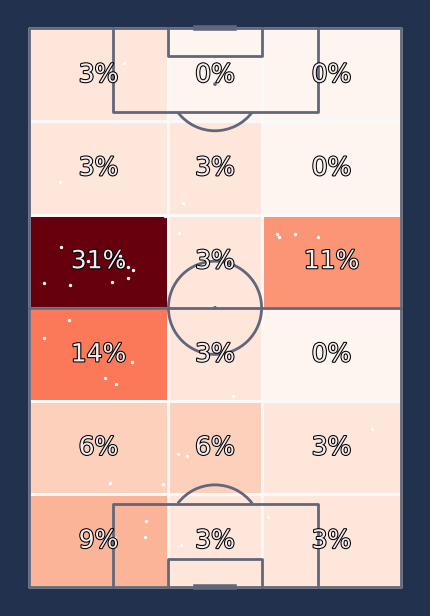

In [6]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22314E', line_color='#61677A')
fig, ax = pitch.draw(figsize=(4.4, 6.4))
fig.set_facecolor('#22314E')

bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                          pitch.dim.six_yard_top, pitch.dim.top]))


bin_statistic = pitch.bin_statistic(df_pass.end_x, df_pass.end_y, statistic='count', bins=(bin_x, bin_y), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

pitch.scatter(df_pass.end_x, df_pass.end_y, c='white', s=2, ax=ax)

plt.savefig('Images/goalKeeperPasses_World_Cup.png')